### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### Define useful functions

In [648]:
def extract_zip_code(hotel_address):
    address_tmp = hotel_address.split(',')[-2].strip(' ').split(' ')[-1][:3]
    if address_tmp == 'NY1':
        return hotel_address.split(',')[-2].strip(' ').split(' ')[-1][2:5]
    else:
        return address_tmp

def extract_price(hotel_room_price):
    room_price_tmp = hotel_room_price.strip('\r').strip('US$')
    if room_price_tmp == '':
        return None
    else:
        room_price_tmp = room_price_tmp.replace(',' , '')
        return float(room_price_tmp)
    
def extract_capacity(hotel_room_capacity):
    if pd.isnull(hotel_room_capacity):
        return None
    else:
        return int(hotel_room_capacity[-1])

def extract_chain(hotel_name):
    hotel_name_lower=hotel_name.lower()
    if 'doubletree by hilton' in hotel_name_lower:
        return 'Doubletree Hilton'
    elif 'homewood suites by hilton' in hotel_name_lower:
        return 'Homewood Suites Hilton'
    elif 'hilton garden' in hotel_name_lower:
        return 'Hilton Garden'
    elif 'home2' in hotel_name_lower:
        return 'Home2 Hilton'
    elif 'tru' in hotel_name_lower:
        return 'Tru Hilton'
    elif 'hilton' in hotel_name_lower:
        return 'Hilton'
    
    elif 'courtyard by marriott' in hotel_name_lower:
        return 'Courtyard Marriott'
    elif 'fairfield inn' in hotel_name_lower:
        return 'Fairfield Inn Marriott'
    elif 'residence inn by marriott' in hotel_name_lower:
        return 'Residence Inn Marriott'
    elif 'marriott' in hotel_name_lower:
        return 'Marriott'
    
    elif 'hyatt' in hotel_name_lower:
        return 'Hyatt'
    elif 'wyndham' in hotel_name_lower:
        return 'Wyndham'
    elif 'embassy' in hotel_name_lower:
        return 'Embassy'
    elif 'sheraton' in hotel_name_lower:
        return 'Sheraton'
    elif 'radisson' in hotel_name_lower:
        return 'Radisson'
    elif 'best western' in hotel_name_lower:
        return 'Best Western'
    elif 'hampton' in hotel_name_lower:
        return 'Hampton'
    elif 'holiday inn' in hotel_name_lower:
        return 'Holiday Inn'
    elif 'westin' in hotel_name_lower:
        return 'Westin'
    elif 'red roof' in hotel_name_lower:
        return 'Red Roof'
    else:
        return 'No chain'

def extract_hotel_room_name(hotel_room_name):
    hotel_room_name_lower=str(hotel_room_name).lower()
    if 'king' in hotel_room_name_lower:
        return 'King'
    elif 'queen' in hotel_room_name_lower:
        return 'Queen'
    elif 'double' in hotel_room_name_lower:
        return 'Double'
    elif 'dormitory' in hotel_room_name_lower:
        return 'Dorm'
    else:
        return 'Other'
       
def extract_hotel_stars(hotel_stars):
    if hotel_stars in ['1 stars', '1-star hotel']:
        return 1.0
    elif hotel_stars in ['1.5 stars', '1.5 star hotel']:
        return 1.5
    elif hotel_stars in ['2 stars', '2-star hotel']:
        return 2.0
    elif hotel_stars in ['2.5 stars', '2.5 star hotel']:
        return 2.5
    elif hotel_stars in ['3 stars', '3-star hotel']:
        return 3.0
    elif hotel_stars in ['3.5 stars', '3.5 star hotel']:
        return 3.5
    elif hotel_stars in ['4 stars', '4-star hotel']:
        return 4.0
    elif hotel_stars in ['4.5 stars', '4.5 star hotel']:
        return 4.5
    elif hotel_stars in ['5 stars', '5-star hotel']:
        return 5.0
    else:
        return None
    
def extract_cleanliness_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[0]
    if item_tmp.split(',')[0]=="'Cleanliness'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_comfort_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[1]
    if item_tmp.split(',')[0]=="'Comfort'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_location_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[2]
    if item_tmp.split(',')[0]=="'Location'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_facilities_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[3]
    if item_tmp.split(',')[0]=="'Facilities'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_staff_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[4]
    if item_tmp.split(',')[0]=="'Staff'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_value_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[5]
    if item_tmp.split(',')[0]=="'Value for money'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_wifi_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')
    if len(item_tmp)<7:
        return None
    elif item_tmp[6].split(',')[0]=="'Free WiFi'":
        return float(item_tmp[6].split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def filter_zip_code(hotel_address_zip_code):
    hotel_address_zip_code_short = hotel_address_zip_code[:3]
    zip_code_list = ['100','101','102','103','104','107','110','111','112','113','114','116']
    if hotel_address_zip_code_short not in zip_code_list:
        return None
    else:
        return hotel_address_zip_code

### Import datasets

In [698]:
df_hotel_detailed_info_list = pd.read_csv('./datasets/sample0_nys_hotel_detailed_info_list.csv',lineterminator='\n')
df_hotel_detailed_info_list_2 = pd.read_csv('./datasets/sample1_nys_hotel_detailed_info_list.csv',lineterminator='\n')

In [699]:
df_negative_sentences_by_topic_pt = pd.read_csv('./datasets/df_negative_sentences_by_topic_pt.csv',lineterminator='\n')

### Cleaning and pre-processing

In [700]:
df_hotel_detailed_info_list.rename(columns={'hotel_room_price\r': 'hotel_room_price'},inplace=True)
df_hotel_detailed_info_list_2.rename(columns={'hotel_room_price\r': 'hotel_room_price_2','hotel_room_name':'hotel_room_name_2','hotel_room_capacity':'hotel_room_capacity_2'},inplace=True)

In [701]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list[~pd.isnull(df_hotel_detailed_info_list['hotel_address'])]
df_hotel_detailed_info_list['hotel_address_zip_code'] = df_hotel_detailed_info_list['hotel_address'].apply(extract_zip_code)

In [702]:
df_hotel_detailed_info_list['hotel_room_price'] = df_hotel_detailed_info_list['hotel_room_price'].apply(extract_price)
df_hotel_detailed_info_list_2['hotel_room_price_2'] = df_hotel_detailed_info_list_2['hotel_room_price_2'].apply(extract_price)

In [703]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list.merge(df_hotel_detailed_info_list_2[['hotel_url','hotel_room_price_2','hotel_room_name_2','hotel_room_capacity_2']],on='hotel_url')

In [704]:
df_hotel_detailed_info_list['hotel_room_capacity'] = df_hotel_detailed_info_list['hotel_room_capacity'].apply(extract_capacity)
df_hotel_detailed_info_list['hotel_room_capacity_2'] = df_hotel_detailed_info_list['hotel_room_capacity_2'].apply(extract_capacity)

In [705]:
df_hotel_detailed_info_list['hotel_room_price_per_person'] = df_hotel_detailed_info_list['hotel_room_price']/df_hotel_detailed_info_list['hotel_room_capacity']
df_hotel_detailed_info_list['hotel_room_price_per_person_2'] = df_hotel_detailed_info_list['hotel_room_price_2']/df_hotel_detailed_info_list['hotel_room_capacity_2']

In [706]:
df_hotel_detailed_info_list['hotel_room_price_per_person_avg'] = df_hotel_detailed_info_list[['hotel_room_price_per_person','hotel_room_price_per_person_2']].mean(axis=1)

In [707]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list[~pd.isnull(df_hotel_detailed_info_list['hotel_room_price_per_person_avg'])]

In [708]:
df_hotel_detailed_info_list['hotel_chain'] = df_hotel_detailed_info_list['hotel_name'].apply(extract_chain)

In [709]:
df_hotel_detailed_info_list['hotel_cleanliness_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_cleanliness_rating)
df_hotel_detailed_info_list['hotel_comfort_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_comfort_rating)
df_hotel_detailed_info_list['hotel_location_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_location_rating)
df_hotel_detailed_info_list['hotel_facilities_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_facilities_rating)
df_hotel_detailed_info_list['hotel_staff_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_staff_rating)
df_hotel_detailed_info_list['hotel_value_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_value_rating)
df_hotel_detailed_info_list['hotel_wifi_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_wifi_rating)

In [710]:
hotel_wifi_median = df_hotel_detailed_info_list['hotel_wifi_rating'].median()
df_hotel_detailed_info_list['hotel_wifi_rating'].fillna(hotel_wifi_median,inplace=True)

In [711]:
df_hotel_detailed_info_list['hotel_stars'] = df_hotel_detailed_info_list['hotel_stars'].apply(extract_hotel_stars)

In [712]:
#df_hotel_detailed_info_list['hotel_room_name'] = df_hotel_detailed_info_list['hotel_room_name'].apply(extract_hotel_room_name)

### Create copy of dataframe

In [713]:
df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list.copy()

### Filter on zip codes

In [714]:
#df_hotel_detailed_info_list_filtered['hotel_address_zip_code'] = df_hotel_detailed_info_list_filtered['hotel_address_zip_code'].apply(filter_zip_code)
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[~pd.isnull(df_hotel_detailed_info_list_filtered['hotel_address_zip_code'])]

### Filter on hotel stars

In [715]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[(df_hotel_detailed_info_list_filtered['hotel_stars']==3.0) | (df_hotel_detailed_info_list_filtered['hotel_stars']==4.0)]

### Media imputation for hotel stars (if not filtered)

In [716]:
hotel_stars_median = df_hotel_detailed_info_list_filtered['hotel_stars'].median()
df_hotel_detailed_info_list_filtered['hotel_stars'].fillna(hotel_stars_median,inplace=True)

### Filter on price per person column

In [717]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[(df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']<125.0)]

### Remove outliers on price per person column

In [718]:
#column_for_outliers = df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']
#outlier_condition = column_for_outliers.between(column_for_outliers.quantile(.10), column_for_outliers.quantile(.90))

In [719]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[outlier_condition]

In [720]:
df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[df_hotel_detailed_info_list_filtered['hotel_name']!='Del Lago Resort & Casino']

### Join with topic count dataframe

In [721]:
df_hotel_detailed_info_list_filtered_merged = df_hotel_detailed_info_list_filtered.merge(df_negative_sentences_by_topic_pt,on='hotel_url',how='left')

### Remove topic=-1 count column (meaning no topic)

In [722]:
df_hotel_detailed_info_list_filtered_merged.drop(['-1'],axis=1,inplace=True)

### Remove hotels with no topic counts at all

In [723]:
df_hotel_detailed_info_list_filtered_merged.dropna(inplace=True)

In [724]:
len(df_hotel_detailed_info_list_filtered_merged)

1522

## Modeling

### Create features and target

In [725]:
#'hotel_cleanliness_rating', 'hotel_comfort_rating','hotel_location_rating', 'hotel_facilities_rating','hotel_staff_rating', 'hotel_value_rating', 'hotel_wifi_rating', hotel_room_name'
df_features = df_hotel_detailed_info_list_filtered_merged.drop(['hotel_name','hotel_url','hotel_address','hotel_rating_breakdown','hotel_room_capacity','hotel_room_price','hotel_room_price_per_person','sentences_count','hotel_room_price_2','hotel_room_price_per_person_2','hotel_room_price_per_person_avg','hotel_room_capacity_2','hotel_room_name','hotel_room_name_2'],axis=1)
df_target = df_hotel_detailed_info_list_filtered_merged[['hotel_room_price_per_person_avg']]

### Standardize numerical features & create dummy variables for categorical features

In [726]:
# 'hotel_room_name'
categorical_features = ['hotel_address_zip_code','hotel_chain']

In [727]:
train_test_scaled_inputs = df_features.copy()
train_test_num_features = train_test_scaled_inputs.drop(categorical_features,axis=1)
train_test_num_features_col = train_test_num_features.columns.values

scaler = StandardScaler()
scaler.fit(train_test_num_features.values)

train_test_num_features = scaler.transform(train_test_num_features.values)
train_test_scaled_inputs[train_test_num_features_col] = train_test_num_features

In [728]:
train_test_scaled_inputs = pd.get_dummies(train_test_scaled_inputs,columns=categorical_features,drop_first=True)

### Train-validation split

In [729]:
# 0.001
x_train, x_val, y_train, y_val = train_test_split(train_test_scaled_inputs,df_target, test_size = 0.2, random_state = 42)

### Random forest

In [730]:
rf = RandomForestRegressor(n_jobs=-1, random_state = 42, n_estimators=200, max_features=10)
rf.fit(x_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [731]:
y_train_rf_pred = rf.predict(x_train)
y_val_rf_pred = rf.predict(x_val)

In [732]:
R2_train=rf.score(x_train,y_train)
adj_R2_train=1-(1-R2_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

R2_val=rf.score(x_val,y_val)
adj_R2_val=1-(1-R2_val)*(x_val.shape[0]-1)/(x_val.shape[0]-x_val.shape[1]-1)

print(R2_train)
print(adj_R2_train)
print()
print(R2_val)
print(adj_R2_val)

0.938266921138073
0.9332734009812416

0.6205300425952525
0.4584090748777312


In [733]:
y_val[:10]

,hotel_room_price_per_person_avg
620,50.500000
1195,40.000000
1606,62.500000
1281,76.000000
1097,47.500000
472,114.500000
939,36.000000
1625,21.666667
1120,104.500000
1171,38.000000


In [734]:
y_val_rf_pred[:10]

array([74.29895833, 59.205     , 45.76958333, 76.39083333, 77.55958333,
       74.87083333, 49.19875   , 46.06166667, 94.25125   , 67.08291667])

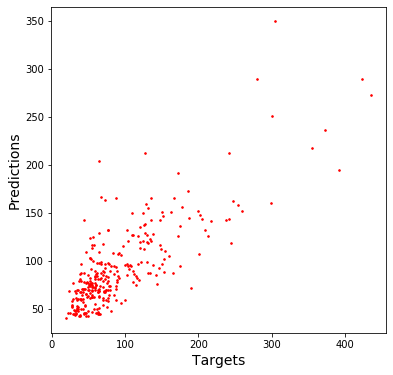

In [735]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_rf_pred, 10, marker='.', c='r')
plt.xlabel('Targets',size=14)
plt.ylabel('Predictions',size=14)
#plt.xlim(19.1,23.5)
#plt.ylim(19.1,23.5)
#_ = plt.plot([19.1,23.5],[19.1,23.5])
plt.show()

### Linear regression

In [736]:
reg = Ridge()
reg.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [737]:
y_train_reg_pred = reg.predict(x_train)
y_val_reg_pred = reg.predict(x_val)

In [738]:
R2_train=reg.score(x_train,y_train)
adj_R2_train=1-(1-R2_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

R2_val=reg.score(x_val,y_val)
adj_R2_val=1-(1-R2_val)*(x_val.shape[0]-1)/(x_val.shape[0]-x_val.shape[1]-1)

print(R2_train)
print(adj_R2_train)
print()
print(R2_val)
print(adj_R2_val)

0.6019079347189099
0.5697067098828396

0.6288673568823717
0.4703083403391596


In [739]:
# get intercept
const=reg.intercept_
print ('intercept = ',const)

# get weights
reg_summary = pd.DataFrame(train_test_scaled_inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary.loc[0:22]

intercept =  [117.81264119]


,Features,Weights
0,hotel_stars,16.966393
1,hotel_overall_rating,13.401370
2,hotel_cleanliness_rating,2.126681
3,hotel_comfort_rating,41.388035
4,hotel_location_rating,11.391574
5,hotel_facilities_rating,-5.995728
6,hotel_staff_rating,2.001494
7,hotel_value_rating,-49.516498
8,hotel_wifi_rating,-1.887977
9,0,-3.387622


In [740]:
y_val[50:60]

,hotel_room_price_per_person_avg
1185,72.00
139,53.00
56,61.50
1545,38.00
84,372.50
157,74.50
1050,23.25
514,60.50
27,72.00
108,63.25


In [741]:
y_val_reg_pred[50:60]

array([[ 84.81910551],
       [ 75.13110319],
       [ 82.90307767],
       [ 43.42701429],
       [228.62101086],
       [ 49.49796215],
       [ 37.85912251],
       [ 47.25753804],
       [121.12301303],
       [ 68.88347792]])

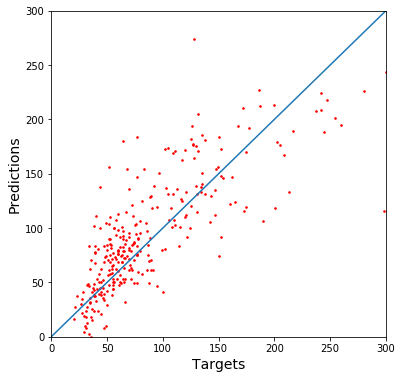

In [744]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_reg_pred, 10, marker='.', c='r')
plt.xlabel('Targets',size=14)
plt.ylabel('Predictions',size=14)
plt.xlim(0.0,300.0)
plt.ylim(0.0,300.0)
_ = plt.plot([0.0,300.0],[0.0,300.0])
plt.show()

## Predictions by varing parameters

In [325]:
input_datapoint = df_hotel_detailed_info_list_filtered_merged.iloc[[100]]
input_datapoint.reset_index(drop=True,inplace=True)

In [326]:
input_datapoint

,hotel_name,hotel_url,hotel_stars,hotel_address,hotel_overall_rating,hotel_rating_breakdown,hotel_room_name,hotel_room_capacity,hotel_room_price,hotel_address_zip_code,...,4,5,6,7,8,9,10,11,12,sentences_count
0,Tea Island Resort,lake-george-3020-lake-shore-drive-tea-island-r...,3.0,"3020 Lake Shore Drive, Lake George, NY 12845, ...",9.1,"[['Cleanliness', '9.2'], ['Comfort', '9.0'], [...",Studio with King Bed & Full Kitchen,2,109.0,128,...,0.018868,0.0,0.09434,0.018868,0.09434,0.0,0.056604,0.226415,0.037736,53.0


### Modify some columns

In [327]:
#input_datapoint.at[0,'hotel_stars'] += 1.0
input_datapoint.at[0,'11'] = 0.00
input_datapoint.at[0,'6'] = 0.00

### Scale and create dummy columns

In [328]:
input_features = input_datapoint.drop(['hotel_name','hotel_url','hotel_address','hotel_rating_breakdown','hotel_room_name','hotel_room_capacity','hotel_room_price','hotel_room_price_per_person','sentences_count'],axis=1)
input_target = input_datapoint[['hotel_room_price_per_person']]

scaled_input = input_features.copy()
input_num_features = scaled_input.drop(categorical_features,axis=1)
input_num_features_col = input_num_features.columns.values
input_num_features = scaler.transform(input_num_features.values)
scaled_input[input_num_features_col] = input_num_features

scaled_input = scaled_input.reindex(columns = train_test_scaled_inputs.columns, fill_value=0)
for cat in categorical_features:
    dummy_cat = cat+'_'+str(input_features[cat].values[0])
    if dummy_cat in scaled_input.columns:
        scaled_input.iloc[0, scaled_input.columns.get_loc(dummy_cat)] = 1

### Get new prediction

In [329]:
input_rf_pred = reg.predict(scaled_input)

In [330]:
#### new prediction #####
input_rf_pred

array([[67.78493607]])

In [331]:
#### old prediction #####
reg.predict(x_train.loc[[100]])

array([[61.0618499]])

In [332]:
#### truth #####
y_train.loc[[100]]

,hotel_room_price_per_person
100,54.5
